In [1]:
import pandas as pd
import numpy as np
import bluebelt as blue
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
n = 100
np.random.seed(25)
series = pd.Series(np.random.weibull(7,n), index=pd.date_range(start='1-1-2020', periods=n), name='main process')

In [3]:
def index(_obj):
    idx = {attr:getattr(_obj, attr) for attr in dir(_obj) if not attr.startswith("_") and not attr.startswith("index")}
    return {key:index(value) if ('__module__' in dir(value)) else value.__doc__ for (key, value) in idx.items()}

In [13]:
d = index(series.blue)

_obj: <class 'pandas.core.series.Series'>
std: <class 'bluebelt.core.series.SeriesToolkit.std'>
patterns: <class 'bluebelt.core.series.SeriesToolkit.patterns'>
datetime: <class 'bluebelt.core.series.SeriesToolkit.datetime'>
data: <class 'bluebelt.core.series.SeriesToolkit.data'>
graphs: <class 'bluebelt.core.series.SeriesToolkit.graphs'>
statistics: <class 'bluebelt.core.series.SeriesToolkit.statistics'>
test: <class 'bluebelt.core.series.SeriesToolkit.test'>
ppa: <class 'bluebelt.core.series.SeriesToolkit.ppa'>
None
_obj: <class 'pandas.core.series.Series'>
None
_obj: <class 'pandas.core.series.Series'>
None
_obj: <class 'pandas.core.series.Series'>
None
_obj: <class 'pandas.core.series.Series'>
None
_obj: <class 'pandas.core.series.Series'>
None
_obj: <class 'pandas.core.series.Series'>
None
_obj: <class 'pandas.core.series.Series'>
None
_obj: <class 'pandas.core.series.Series'>
None


In [6]:
series.groupby(series.index.strftime('%Y-%V')).sum()

2020-01    4.651412
2020-02    6.200982
2020-03    6.443788
2020-04    7.105142
2020-05    6.491051
2020-06    6.932505
2020-07    6.683871
2020-08    6.056221
2020-09    6.825351
2020-10    6.888297
2020-11    6.071013
2020-12    6.669999
2020-13    6.201647
2020-14    6.485115
2020-15    3.512570
Name: main process, dtype: float64

In [7]:
series.groupby(series.index.strftime('%Y-%')).sum()

2020-%    93.218964
Name: main process, dtype: float64

In [8]:
def add_datetime_metadata(series):
    frame = pd.DataFrame(data={'datetime': series.index.values, 'values': series.values})
    frame['year'] = frame['datetime'].dt.year
    frame['quarter'] = frame['datetime'].dt.quarter
    frame['month'] = frame['datetime'].dt.month
    frame['day'] = frame['datetime'].dt.day
    frame['weekday'] = frame['datetime'].dt.weekday
    frame['day_name'] = frame['datetime'].dt.day_name()
    frame['iso_year'] = frame['datetime'].dt.isocalendar().year
    frame['iso_week'] = frame['datetime'].dt.isocalendar().week

    return frame

In [9]:
gr = add_datetime_metadata(series).groupby(['iso_year', 'iso_week']).agg({'values': 'sum'})['values']

In [10]:
gr.index.values

array([(2020, 1), (2020, 2), (2020, 3), (2020, 4), (2020, 5), (2020, 6),
       (2020, 7), (2020, 8), (2020, 9), (2020, 10), (2020, 11),
       (2020, 12), (2020, 13), (2020, 14), (2020, 15)], dtype=object)

ValueError: setting an array element with a sequence.

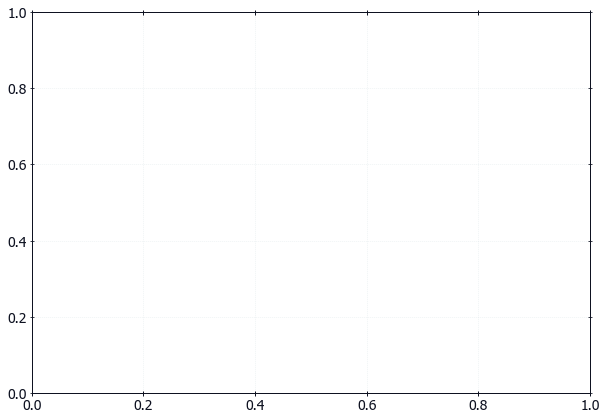

In [11]:
plt.plot(gr.index.values, gr.values)

In [ ]:
pd.Series(series.index.values).dt.isocalendar().year

In [ ]:
def dict_levels(data, levels=1):
    for key in data:
        if isinstance(data.get(key), dict):
            return dict_levels(data.get(key), levels=levels+1)
        else:
            return levels

In [ ]:
def dict_to_md(data, level=1, **kwargs):
    result = ''
    for key, value in data.items():
        if isinstance(value, dict):
            result += f'{"#"*level} {key}\n'+dict_to_md(value, level=level+1)
        else:
            if value is not None:
                # deal with leading spaces and such
                value = value[2:] if value.startswith("\n") else value
                leading_spaces = len(value) - len(value.lstrip())
                value = value.lstrip()
                value = value.replace(" "*leading_spaces, "")
            result += f'{"#"*level} {key}\n{value}\n\n'
    return result

In [ ]:
def dict_to_print(data, level=0, indent=2, **kwargs):
    result = ''
    for key, value in data.items():
        if isinstance(value, dict):
            result += f'{" "*indent*level}- {key}\n'+dict_to_print(value, level=level+1)
        else:
            if value is not None:
                # deal with leading spaces and such
                value = value[2:] if value.startswith("\n") else value
                leading_spaces = len(value) - len(value.lstrip())
                value = value.lstrip()
                value = value.replace(" "*leading_spaces, "")
            result += f'{" "*indent*level}- {key}\n{" "*(indent*level+indent)}{value}\n\n'
    return result

In [ ]:
print(dict_to_print(d))

In [ ]:
print(dict_to_md(d, level=3))